# Лабораторная работа по заданию №  5. Алгоритмы на графах. Введение в графы и основные алгоритмы на графах

In [125]:
import numpy as np
import networkx as nx
import random
import sys
import time
import matplotlib.pyplot as plt
#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=100)

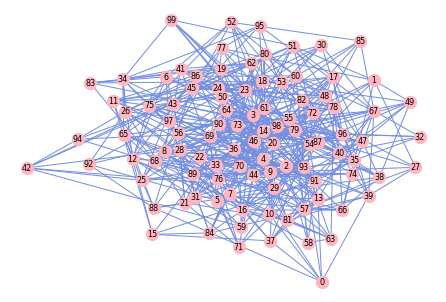

In [57]:
G=nx.generators.random_graphs.gnm_random_graph(100, 500, 25)
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(0,10)
nx.draw(G, node_size=150,  with_labels=True, node_color='#FFB6C1', width=1, edge_color='#748EE1', font_size=8)

In [58]:
adjacency_matrix=nx.to_numpy_matrix(G)
print(adjacency_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [68]:
node_1=random.randint(0, 99)
node_2=random.randint(0, 99)
print("Node 1:"+str(node_1))
print("Node 2:"+str(node_2))

Node 1:48
Node 2:8


## Кратчайшее расстояние: алгоритм Дийкстры

In [69]:
res_time=0
for i in range (10):
    start_time = time.time()
    path_length=nx.dijkstra_path_length(G,node_1,node_2)
    current_time=time.time() - start_time
    print("Current time: "+str('{:0.9f}'.format(current_time)))
    res_time=res_time+current_time
print("Mean time: "+str('{:0.9f}'.format(res_time/10)))
print("Path length: "+str(path_length))
print("Path:")
print(nx.dijkstra_path(G,node_1,node_2))

Current time: 0.000000000
Current time: 0.000000000
Current time: 0.000000000
Current time: 0.000000000
Current time: 0.000000000
Current time: 0.000999928
Current time: 0.000000000
Current time: 0.000000000
Current time: 0.000000000
Current time: 0.000000000
Mean time: 0.000099993
Path length: 2
Path:
[48, 37, 0, 39, 30, 8]


## Кратчайшее расстояние: алгоритм Беллмана-Форда

In [70]:
res_time=0
for i in range (10):
    start_time = time.time()
    length, path = nx.single_source_bellman_ford(G, node_1, node_2)
    current_time=time.time() - start_time
    print("Current time: "+str('{:0.9f}'.format(current_time)))
    res_time=res_time+current_time
print("Mean time: "+str('{:0.9f}'.format(res_time/10)))
print("Path length: "+str(length))
print("Path:")
print(path)

Current time: 0.002000332
Current time: 0.002001047
Current time: 0.002000093
Current time: 0.003001690
Current time: 0.001999378
Current time: 0.002001047
Current time: 0.002000093
Current time: 0.002000332
Current time: 0.002000093
Current time: 0.002000570
Mean time: 0.002100468
Path length: 2
Path:
[48, 37, 0, 39, 30, 8]


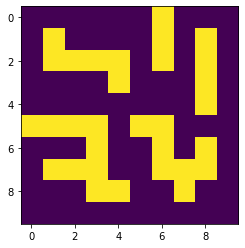

In [107]:
grid=np.array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
              [0, 1, 1, 1, 1, 0, 1, 0, 1, 0],
              [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
              [1, 1, 1, 1, 0, 1, 1, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
              [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
              [0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
plt.imshow(grid)

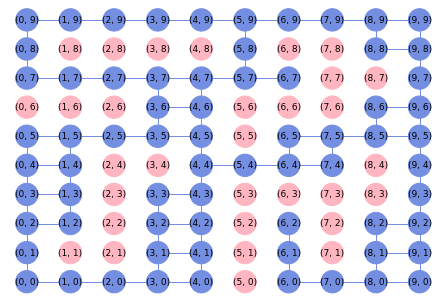

In [217]:
G = nx.grid_2d_graph(10, 10)

def dist(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

obstacles_list=np.argwhere(grid == 1).tolist()
for (u, v) in G.edges():
    if list(v) in obstacles_list or list(u) in obstacles_list:        
        G.edges[u,v]['weight'] = 100000
        G.edges[u,v]['color'] = 'w'
    else:
        G.edges[u,v]['weight'] = 0
        G.edges[u,v]['color'] = '#748EE1'
adjacency_matrix=nx.to_numpy_matrix(G)
pos = dict( (n, n)  for n in G.nodes() )
color_map = []
for node in G:
    if list(node) in obstacles_list:
        color_map.append('#FFB6C1')
    else: 
        color_map.append('#748EE1')
        
colors = [G[u][v]['color'] for u,v in G.edges()]        
nx.draw(G, pos, node_size=500,  with_labels=True, node_color=color_map, width=1, edge_color=colors, font_size=9)

labels = nx.get_edge_attributes(G,'weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)


In [227]:
start=(4,0)
end=(6,0)
shortest_path=nx.astar_path(G,start,end,dist)
print(shortest_path)
edges_path=[]
for i in range (len(shortest_path)-1):
    edges_path.append((shortest_path[i], shortest_path[i+1]))
print (edges_path)

[(4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (5, 4), (6, 4), (7, 4), (7, 5), (8, 5), (9, 5), (9, 4), (9, 3), (9, 2), (8, 2), (8, 1), (8, 0), (7, 0), (6, 0)]
[((4, 0), (4, 1)), ((4, 1), (4, 2)), ((4, 2), (4, 3)), ((4, 3), (4, 4)), ((4, 4), (5, 4)), ((5, 4), (6, 4)), ((6, 4), (7, 4)), ((7, 4), (7, 5)), ((7, 5), (8, 5)), ((8, 5), (9, 5)), ((9, 5), (9, 4)), ((9, 4), (9, 3)), ((9, 3), (9, 2)), ((9, 2), (8, 2)), ((8, 2), (8, 1)), ((8, 1), (8, 0)), ((8, 0), (7, 0)), ((7, 0), (6, 0))]


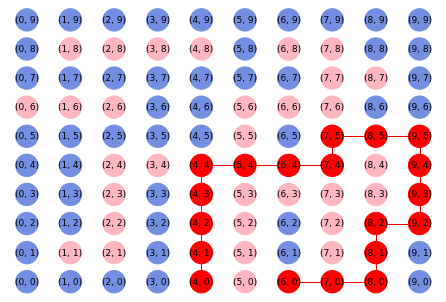

In [231]:
color_map = []

for node in G:
    if node in shortest_path:
        color_map.append('r')  
    elif list(node) in obstacles_list:
        color_map.append('#FFB6C1')
    else: 
        color_map.append('#748EE1')


e_color_map = []
for edge in G.edges():
    if edge in edges_path or (edge[1], edge[0]) in edges_path:
        e_color_map.append('r')
    else:
        e_color_map.append('w')
    
nx.draw(G, pos, node_size=500,  with_labels=True, node_color=color_map, width=1, edge_color= e_color_map, font_size=9)